# Regressions

<a rel="license" href="https://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons Licence" style="width=50" src="https://licensebuttons.net/l/by-nc-sa/4.0/88x31.png" title='This work is licensed under a Creative Commons Attribution 4.0 International License.' align="right"/></a>

**Authors**: Dr Matteo Degiacomi (matteo.t.degiacomi@durham.ac.uk) and Dr Antonia Mey (antonia.mey@ed.ac.uk)

Content is partially adapted from [Software Carpentry Course on Neural Networks](https://carpentries-incubator.github.io/machine-learning-novice-sklearn/06-neural-networks/index.html)

**Jupyter cheat sheet**:
- to run the currently highlighted cell, hold <kbd>&#x21E7; Shift</kbd> and press <kbd>&#x23ce; Enter</kbd>;
- to get help for a specific function, place the cursor within the function's brackets, hold <kbd>&#x21E7; Shift</kbd>, and press <kbd>&#x21E5; Tab</kbd>;

## 1. Introduction

regressions ...
- understanding trends in data
- predicting the resultant value of a variable associated with a specific combination on features

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## 2. Multi-layer Perceptrons (MLP)

A single neuron (perceptron) cannot be used to solve a non-linearly separable function. For that, we need to use multiple perceptrons and typically multiple layers of perceptrons. They are formed of networks of artificial neurons which each take one or more inputs and typically have a single output. The neurons are connected together in large networks typically of 10s to 1000s of neurons. Typically, networks are connected in layers with an input layer, middle or hidden layer (or layers) and finally an output layer.

The advantage of MLPs, is that they can identify patterns, and fit them with a model, in high dimensional and complex datasets. The disadvantage, however, is that their **interpretability is very low**: it is usually very difficult to tell how the neural network is making a prediciton. Therefore, MLPs are better suited in tasks where predictions are needed. If insight into the specific relationship between data (e.g. a physical model) is needed, non-linear fitting is a better approach.

In this tutorialwe will use the [MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) class in scikit-learn, which enables us to build and train such networks.



### 2.1. MLP vs linear distribution

Let's start by creating some linear data. We will use the `make_regression` method of scikit-learn to generate some noisy data. In this context, a simple 2-dimensional scatter plot can be seen as a single feature associated with a predicted value.

In [94]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_features=1, n_samples=500, noise=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)

We will now fit the generated data with an MLP.

In [95]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(max_iter=200).fit(X_train, y_train)
print(f'success rate of test set: {regr.score(X_test, y_test)}')

success rate of test set: 0.7436885643422068


C:\Users\xdzl45\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


You may have noticed that the execution of the cell above throws a warning: the optimization has not converged yet. The training of an MLP is iterative, and continues until a halting condition (maximum number of iteration, `max_iter`) is reached. At every step, the loss function (the error between data predicted by the MLP and the real training data) is evaluated. This error tells us that at the last optimization step the loss function was still decreasing. Let's take a look at that:

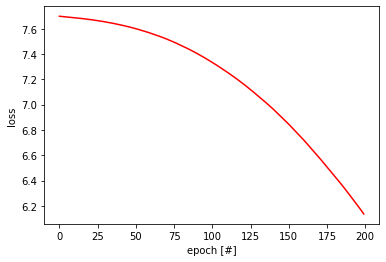

In [96]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(np.log(regr.loss_curve_), color="r")
ax.set_xlabel("epoch [#]")
ax.set_ylabel("loss");

<div class="alert alert-success">
<b>Task 1.</b> What happens to the success rate if you increase the <code>max_iter</code>? How does the loss function evolution look like?</div>

<details>
<summary> <mark> Answer 1</mark> </summary>
...</details>

We now have a trained MLP! Let's compare the predictions it makes with the regression data provided as input.

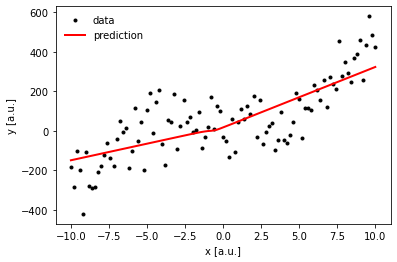

In [123]:
x_pred = np.array([np.linspace(np.min(X), np.max(X), len(X))]).T
y_pred = regr.predict(x_pred)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel("x [a.u.]")
ax.set_ylabel("y [a.u.]")
ax.plot(X, y, "k.", lw=0, label="data")
ax.plot(x_pred, y_pred, "r-", lw=2, label="prediction")
plt.legend(frameon=False);

<div class="alert alert-success">
<b>Task 2.</b> What happens to model when you alter the <code>max_iter</code> in the training phase of the MLP?

<details>
<summary> <mark> Answer 2</mark> </summary>
...</details>

### 2.2 MLP vs higher order polynomial

Instead of a linear model, let's now try to fit somethig a bit "wobblier": a third order polynomial: 

In [100]:
def fct(x, a, b, c, d):
    return d*x**3 + c*x**2 - b*x + a

# generate polynomial
x = np.linspace(-10, 10, 101)
y = fct(x, 1, 2, 1, 0.5) + np.random.normal(0, 100, len(x))

# make training and test set
X = np.array([x]).T
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)

Like before, let's fit the data with an MLP and plot the data along with the MLP predictions.

C:\Users\xdzl45\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


success rate of test set: 0.6765789744039916


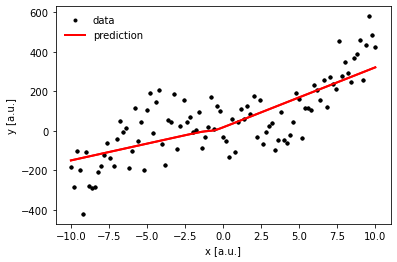

In [124]:
# train MLP
regr = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000).fit(X_train, y_train)
print(f'success rate of test set: {regr.score(X_test, y_test)}')

# predict values with trained MLP
x_pred = np.array([np.linspace(np.min(X), np.max(X), len(X))]).T
y_pred = regr.predict(x_pred)

#plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel("x [a.u.]")
ax.set_ylabel("y [a.u.]")
ax.plot(X, y, "k.", lw=0)
ax.plot(x_pred, y_pred, "r-", lw=2)
ax.plot(X, y, "k.", lw=0, label="data")
ax.plot(x_pred, y_pred, "r-", lw=2, label="prediction")
plt.legend(frameon=False);

The model seems a bit so-so: the success rate is poor, and the red line, showing the prediction made by the neural network for different values of x, does not seem to follow the data very well. Again, it does not seem we have reached convergence, so we can increase `max_iter`. There is something else we can do, tough.

You may have noticed that in the cell above, the MLPRegressor call features a new optional parameter: `hidden_layer_sizes`. This is a tuple determining the number of hidden layers, and how many neurons each of them contains. For instance, `(100, 50)` means that the MLP will have two layers, the first with 100 neurons and the second with 50.

<div class="alert alert-success">
<b>Task 2.</b> What happens to the success rate and the resulting model, when altering the <code>hidden_layer_sizes</code>? Try to change the number of neurons and the number of layers.</div>

<details>
<summary> <mark> Answer 2</mark> </summary>
Both increasing the number of neurons and the depth of the network, makes the model more accurate.</details>

In [121]:
###OVERFITTING!###

### 2.3. MLP vs high dimensional data

Up to now, the data we have been analysing could have been easily fit with any other more common method (e.g. with simple linear regressions). Data can be highly multidimensional though, and in this case MLP can be helpful. Let's generate a collection of 100-dimensional datapoints and fit a model onto them. Of course we will not be able to plot them, but we will be able to see how well the MLP peforms in the test phase.

In [87]:
X, y = make_regression(n_samples=500)
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X.shape)

(500, 100)


Let's now train and test an MLP.

In [ ]:
regr = MLPRegressor(max_iter=500).fit(X_train, y_train)
regr.score(X_test, y_test)

## 3. Deep Learning

...

## 3. Conclusion

<div class="alert alert-info">
<b>Key points:
- ...
</b></div>
